### Data provided by the Swiss National Science Foundation
1. list of all projects to which funds have been allocated since 1975. 2. all people to which funds have been awarded during the same period

### objectives
1. How much money is awarded on average depending on gender?
2. How long does it take for a new researcher to apply for grant? (operationalized as time to go from employee to applicant status)

In [2]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#### import data

In [5]:
# local import; downloaded from "http://p3.snf.ch/P3Export/"
projects = pd.read_csv('Data/P3_GrantExport.csv',sep = ';')
persons = pd.read_csv('Data/P3_PersonExport.csv',sep = ';')

In [ ]:
# quick look at the data

In [6]:
projects.head(5)

,Project Number,Project Number String,Project Title,Project Title English,Responsible Applicant,Funding Instrument,Funding Instrument Hierarchy,Institution,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
0,1,1000-000001,Schlussband (Bd. VI) der Jacob Burckhardt-Biog...,NaN,Kaegi Werner,Project funding (Div. I-III),Project funding,NaN,NaN,Unassignable - NA,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,11619.00,NaN
1,4,1000-000004,Batterie de tests à l'usage des enseignants po...,NaN,Massarenti Léonard,Project funding (Div. I-III),Project funding,Faculté de Psychologie et des Sciences de l'Ed...,Switzerland,University of Geneva - GE,10104,Educational science and Pedagogy,"Humanities and Social Sciences;Psychology, edu...",10104,01.10.1975,30.09.1976,41022.00,NaN
2,5,1000-000005,Kritische Erstausgabe der 'Evidentiae contra D...,NaN,Kommission für das Corpus philosophorum medii ...,Project funding (Div. I-III),Project funding,Kommission für das Corpus philosophorum medii ...,Switzerland,"Non-profit organisations (libraries, museums, ...",10101,Philosophy,Humanities and Social Sciences;Linguistics and...,10101,01.03.1976,28.02.1985,79732.00,NaN
3,6,1000-000006,Katalog der datierten Handschriften in der Sch...,NaN,Burckhardt Max,Project funding (Div. I-III),Project funding,Abteilung Handschriften und Alte Drucke Univer...,Switzerland,University of Basel - BS,10302,Swiss history,Humanities and Social Sciences;Theology & reli...,10302,01.10.1975,30.09.1976,52627.00,NaN
4,7,1000-000007,Wissenschaftliche Mitarbeit am Thesaurus Lingu...,NaN,Schweiz. Thesauruskommission,Project funding (Div. I-III),Project funding,Schweiz. Thesauruskommission,Switzerland,"Non-profit organisations (libraries, museums, ...",10303,Ancient history and Classical studies,Humanities and Social Sciences;Theology & reli...,10303,01.01.1976,30.04.1978,120042.00,NaN


In [7]:
persons.head(5)

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person
0,a Marca,Davide,male,NaN,NaN,53856,NaN,NaN,NaN,NaN,NaN,36549,NaN
1,a Marca,Andrea,male,NaN,NaN,132628,NaN,67368,NaN,NaN,NaN,NaN,NaN
2,A. Jafari,Golnaz,female,Universität Luzern,Luzern,747886,NaN,191432,NaN,NaN,NaN,NaN,NaN
3,Aaberg,Johan,male,NaN,NaN,575257,NaN,NaN,NaN,NaN,NaN,119868,NaN
4,Aahman,Josefin,female,NaN,NaN,629557,NaN,NaN,NaN,NaN,NaN,141014,NaN


#### merge tables
First we need to figure out how to merge the tables

In [9]:
# let's sample an individual researcher
persons.iloc[10041]


Last Name                                                                    Bodenmann
First Name                                                                         Guy
Gender                                                                            male
Institute Name                       Lehrstuhl für Klinische Psychologie Kinder/Jug...
Institute Place                                                                 Zürich
Person ID SNSF                                                                   47670
OCRID                                                              0000-0003-0964-6409
Projects as responsible Applicant    46820;56660;62901;109547;115948;128960;129627;...
Projects as Applicant                                             112141;122090;166348
Projects as Partner                                                                NaN
Projects as Practice Partner                                                       NaN
Projects as Employee                       

In [ ]:
# Most important are the entries "Projects as Employee" and "Projects as Responsible Applicant"
# These indicate the projects applied for and will need to be matched to the project database
# From there, summary wrt the objects should be straightforward

In [ ]:
# But how to merge?
# By project id is the obvious solution, but they are lumped together as a CSV nested list

#### split strings and reassign to proper rows
Like R, we can use a string-split function and apply it across the relevant columns.
We will split, clean, and then assign to the appropriate personal ids.

In [10]:
# First, we run the string splits for each entry and save
projID_a = persons['Projects as responsible Applicant'].apply(lambda x: x.split(';') if not pd.isna(x) else np.nan)
projID_e = persons['Projects as Employee'].apply(lambda x: x.split(';') if not pd.isna(x) else np.nan)

In [12]:
# Now lets take a quick scan of the entire result
projID_a

0                                             NaN
1                                         [67368]
2                                        [191432]
3                                             NaN
4                                             NaN
                           ...                   
110811    [52821, 143769, 147153, 165510, 183584]
110812                                        NaN
110813                                        NaN
110814                                        NaN
110815                                        NaN
Name: Projects as responsible Applicant, Length: 110816, dtype: object

In [ ]:
# Quite a few NaN, meaning these employees had no relevant activity wrt grant applications...
# As far as merging is concerned, we can therefore safely remove the entries that contain NaN

In [13]:
# Pandas has a function that we can use to index columns with NaN, pd.isna; lets
pd.isna(projID_a)

0          True
1         False
2         False
3          True
4          True
          ...  
110811    False
110812     True
110813     True
110814     True
110815     True
Name: Projects as responsible Applicant, Length: 110816, dtype: bool

In [ ]:
# Seems okay...

In [ ]:
# So now, we use it to create "clean" copies of our indexing list

In [27]:
# First, for applicants
applicants = persons.copy()
applicants['projID'] = projID_a
applicants = applicants[~pd.isna(projID_a)]
applicants

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person,projID
1,a Marca,Andrea,male,NaN,NaN,132628,NaN,67368,NaN,NaN,NaN,NaN,NaN,[67368]
2,A. Jafari,Golnaz,female,Universität Luzern,Luzern,747886,NaN,191432,NaN,NaN,NaN,NaN,NaN,[191432]
7,Aapro,Matti S.,male,Clinique de Genolier F.M.H. Oncologie-Hématolo...,Genolier,3268,NaN,8532;9513,8155,NaN,NaN,NaN,NaN,"[8532, 9513]"
11,Aas,Gregor,male,Lehrstuhl für Pflanzenphysiologie Universität ...,Bayreuth,36412,NaN,52037,NaN,NaN,NaN,NaN,NaN,[52037]
17,Abadier,Michael,male,The La Jolla Institute for Allergy and Immunology,La Jolla,592871,NaN,158972,NaN,NaN,NaN,133092,NaN,[158972]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110788,Zwolensky,Anton,male,NaN,NaN,594698,NaN,138839,NaN,NaN,NaN,NaN,NaN,[138839]
110792,Zwyssig,Philipp,male,Abteilung für Neuere Geschichte Historisches I...,Bern,624211,NaN,179533,NaN,NaN,NaN,144564,NaN,[179533]
110807,Zysset,Martin,male,NaN,NaN,75080,NaN,46488,NaN,NaN,NaN,NaN,NaN,[46488]
110809,Zysset,Alain,male,Chaire de droit international public et de dro...,Fribourg,581625,NaN,148582,NaN,NaN,NaN,130447,NaN,[148582]


In [15]:
# Next, for employees
employees = persons.copy()
employees['projID'] = projID_e
employees = employees[~pd.isna(projID_e)]
employees

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person,projID
0,a Marca,Davide,male,NaN,NaN,53856,NaN,NaN,NaN,NaN,NaN,36549,NaN,[36549]
3,Aaberg,Johan,male,NaN,NaN,575257,NaN,NaN,NaN,NaN,NaN,119868,NaN,[119868]
4,Aahman,Josefin,female,NaN,NaN,629557,NaN,NaN,NaN,NaN,NaN,141014,NaN,[141014]
5,Aalai,Mandana,female,NaN,NaN,54856,NaN,NaN,NaN,NaN,NaN,32102,NaN,[32102]
6,Äämismaa,Päivi,male,Abteilung Biophysikalische Chemie Biozentrum d...,Basel,509100,NaN,NaN,NaN,NaN,NaN,58800;107793,NaN,"[58800, 107793]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110811,Zysset,Philippe,male,Institut für chirurgische Technologien und Bio...,Bern,40950,0000-0002-4712-7047,52821;143769;147153;165510;183584,33565;61944;64562;67942,NaN,NaN,33565,NaN,[33565]
110812,Zysset,Simonetta,female,Institut für Computersysteme ETH Zürich,Zürich,554773,NaN,NaN,NaN,NaN,NaN,122957,NaN,[122957]
110813,Zysset,Annina,female,Departement Gesundheit Institut für Gesundheit...,Winterthur,636704,0000-0002-9871-5324,NaN,NaN,NaN,NaN,147673,NaN,[147673]
110814,Zytowski,Torsten,male,NaN,NaN,52396,NaN,NaN,NaN,NaN,NaN,32730,NaN,[32730]


In [28]:
# projIDs are there now, but still presents as a list.
# we will next use Pandas equivalent of sapply to "explode" them out to individual rows for each project
applicants = applicants.explode('projID')
employees = employees.explode('projID')

In [29]:
# Let's check....
applicants

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,Projects as Practice Partner,Projects as Employee,Projects as Contact Person,projID
1,a Marca,Andrea,male,NaN,NaN,132628,NaN,67368,NaN,NaN,NaN,NaN,NaN,67368
2,A. Jafari,Golnaz,female,Universität Luzern,Luzern,747886,NaN,191432,NaN,NaN,NaN,NaN,NaN,191432
7,Aapro,Matti S.,male,Clinique de Genolier F.M.H. Oncologie-Hématolo...,Genolier,3268,NaN,8532;9513,8155,NaN,NaN,NaN,NaN,8532
7,Aapro,Matti S.,male,Clinique de Genolier F.M.H. Oncologie-Hématolo...,Genolier,3268,NaN,8532;9513,8155,NaN,NaN,NaN,NaN,9513
11,Aas,Gregor,male,Lehrstuhl für Pflanzenphysiologie Universität ...,Bayreuth,36412,NaN,52037,NaN,NaN,NaN,NaN,NaN,52037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110811,Zysset,Philippe,male,Institut für chirurgische Technologien und Bio...,Bern,40950,0000-0002-4712-7047,52821;143769;147153;165510;183584,33565;61944;64562;67942,NaN,NaN,33565,NaN,52821
110811,Zysset,Philippe,male,Institut für chirurgische Technologien und Bio...,Bern,40950,0000-0002-4712-7047,52821;143769;147153;165510;183584,33565;61944;64562;67942,NaN,NaN,33565,NaN,143769
110811,Zysset,Philippe,male,Institut für chirurgische Technologien und Bio...,Bern,40950,0000-0002-4712-7047,52821;143769;147153;165510;183584,33565;61944;64562;67942,NaN,NaN,33565,NaN,147153
110811,Zysset,Philippe,male,Institut für chirurgische Technologien und Bio...,Bern,40950,0000-0002-4712-7047,52821;143769;147153;165510;183584,33565;61944;64562;67942,NaN,NaN,33565,NaN,165510


In [30]:
# Looks good; individual project ids now occupy their own row with appropriate duplication of other info

#### Let's continue our cleaning operation...

In [31]:
# First confirm number of entries
len(applicants)

74657

In [44]:
# And removes blanks entries, if any
applicants = applicants[applicants.projID.apply(lambda x: len(x) > 0)]
employees = employees[employees.projID.apply(lambda x: len(x) > 0)]

In [45]:
# Lets check length now...
len(applicants)

74655

In [ ]:
# Seems to have been useful. Good.

#### Continue with merge

In [32]:
# Now we can merge
merged_appl = pd.merge(applicants, projects, left_on='projID', right_on='Project Number')
merged_empl = pd.merge(employees, projects, left_on='projID', right_on='Project Number')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [ ]:
# Yikes. Seems projID is stored as a string. Lets convert to int and rerun the merge...

In [46]:
# convert projID to integer
applicants.projID = applicants.projID.astype(int)
employees.projID = employees.projID.astype(int)

In [47]:
# re-run merge
merged_appl = pd.merge(applicants, projects, left_on='projID', right_on='Project Number')
merged_empl = pd.merge(employees, projects, left_on='projID', right_on='Project Number')

In [48]:
# and lets check the results
merged_appl

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,...,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
0,a Marca,Andrea,male,NaN,NaN,132628,NaN,67368,NaN,NaN,...,NaN,Unassignable - NA,10206,Social geography and ecology,"Humanities and Social Sciences;Ethnology, soci...",10206/10302,01.12.2002,31.12.2002,20120.00,NaN
1,A. Jafari,Golnaz,female,Universität Luzern,Luzern,747886,NaN,191432,NaN,NaN,...,Norway,Institution abroad - IACH,10205,Legal sciences,"Humanities and Social Sciences;Economics, law",10205,01.02.2020,31.07.2021,data not included in P3,"Information, Communications Technology; Distri..."
2,Aapro,Matti S.,male,Clinique de Genolier F.M.H. Oncologie-Hématolo...,Genolier,3268,NaN,8532;9513,8155,NaN,...,Switzerland,Other Hospitals - ASPIT,30703,Clinical Cancer Research,Biology and Medicine;Clinical Medicine,30703,01.01.1986,31.12.1988,211427.00,NaN
3,Aapro,Matti S.,male,Clinique de Genolier F.M.H. Oncologie-Hématolo...,Genolier,3268,NaN,8532;9513,8155,NaN,...,Switzerland,Other Hospitals - ASPIT,30703,Clinical Cancer Research,Biology and Medicine;Clinical Medicine,30703,01.10.1988,30.09.1990,174021.00,NaN
4,Aas,Gregor,male,Lehrstuhl für Pflanzenphysiologie Universität ...,Bayreuth,36412,NaN,52037,NaN,NaN,...,NaN,Unassignable - NA,30205,Agricultural and Forestry Sciences,Biology and Medicine;General Biology,30205,11.09.1997,10.10.1997,8865.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74650,Zysset,Philippe,male,Institut für chirurgische Technologien und Bio...,Bern,40950,0000-0002-4712-7047,52821;143769;147153;165510;183584,33565;61944;64562;67942,NaN,...,Switzerland,EPF Lausanne - EPFL,30714,Biomedical Engineering,Biology and Medicine;Clinical Medicine,30714,01.07.1998,30.06.2001,150524.00,NaN
74651,Zysset,Philippe,male,Institut für chirurgische Technologien und Bio...,Bern,40950,0000-0002-4712-7047,52821;143769;147153;165510;183584,33565;61944;64562;67942,NaN,...,Switzerland,University of Berne - BE,30714,Biomedical Engineering,Biology and Medicine;Clinical Medicine,30714/20502/20506,01.02.2013,30.09.2016,346000.00,osteoporosis; finite element analysis; proxima...
74652,Zysset,Philippe,male,Institut für chirurgische Technologien und Bio...,Bern,40950,0000-0002-4712-7047,52821;143769;147153;165510;183584,33565;61944;64562;67942,NaN,...,Switzerland,University of Berne - BE,30714,Biomedical Engineering,Biology and Medicine;Clinical Medicine,30714/20502/20506,01.06.2013,31.05.2017,262960.00,magnetic resonance imaging; finite element ana...
74653,Zysset,Philippe,male,Institut für chirurgische Technologien und Bio...,Bern,40950,0000-0002-4712-7047,52821;143769;147153;165510;183584,33565;61944;64562;67942,NaN,...,Switzerland,University of Berne - BE,20505,Material Sciences,"Mathematics, Natural- and Engineering Sciences...",20505/20502/30809,01.10.2016,31.03.2021,449517.00,computational modelling; micro-cracks; osteopo...


In [49]:
# and employees...
merged_empl

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,...,Institution Country,University,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords
0,a Marca,Davide,male,NaN,NaN,53856,NaN,NaN,NaN,NaN,...,Switzerland,University of Lausanne - LA,20403,Particle Physics,"Mathematics, Natural- and Engineering Sciences...",20403,01.04.1993,31.03.1994,553356.00,NaN
1,Benslama,Kamal,male,Department of Physics University of Regina,Regina,56493,NaN,NaN,NaN,NaN,...,Switzerland,University of Lausanne - LA,20403,Particle Physics,"Mathematics, Natural- and Engineering Sciences...",20403,01.04.1993,31.03.1994,553356.00,NaN
2,Frei,Raymond,male,NaN,NaN,13911,NaN,NaN,NaN,NaN,...,Switzerland,University of Lausanne - LA,20403,Particle Physics,"Mathematics, Natural- and Engineering Sciences...",20403,01.04.1993,31.03.1994,553356.00,NaN
3,Galoumian,Pavlik,male,CERN Division PPE,Genève 23,25506,NaN,NaN,NaN,NaN,...,Switzerland,University of Lausanne - LA,20403,Particle Physics,"Mathematics, Natural- and Engineering Sciences...",20403,01.04.1993,31.03.1994,553356.00,NaN
4,Hertig,Jean-Philippe,male,NaN,NaN,14162,NaN,NaN,NaN,NaN,...,Switzerland,University of Lausanne - LA,20403,Particle Physics,"Mathematics, Natural- and Engineering Sciences...",20403,01.04.1993,31.03.1994,553356.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127126,Zwicky,Heinrich,male,Departement Soziale Arbeit ZHAW Zürcher Hochsc...,Zürich,13256,NaN,2063;28262;30423;120223,64746,NaN,...,NaN,University of Zurich - ZH,10201,Sociology,"Humanities and Social Sciences;Sociology, soci...",10201,01.04.1990,28.02.1991,40000.00,NaN
127127,Zwicky,Heinrich,male,Departement Soziale Arbeit ZHAW Zürcher Hochsc...,Zürich,13256,NaN,2063;28262;30423;120223,64746,NaN,...,NaN,University of Zurich - ZH,10201,Sociology,"Humanities and Social Sciences;Sociology, soci...",10201,01.04.1991,30.06.1993,202631.00,NaN
127128,Zysset,Sylvia,female,NaN,NaN,100263,NaN,NaN,NaN,NaN,...,Switzerland,University of Basel - BS,10501,German and English languages and literature,Humanities and Social Sciences;Linguistics and...,10501,01.11.1998,31.12.2001,117014.00,SHAKESPEARE; AUSGABE
127129,Zysset,Philippe,male,Institut für chirurgische Technologien und Bio...,Bern,40950,0000-0002-4712-7047,52821;143769;147153;165510;183584,33565;61944;64562;67942,NaN,...,Switzerland,EPF Lausanne - EPFL,20505,Material Sciences,"Mathematics, Natural- and Engineering Sciences...",20505,01.11.1992,31.10.1993,40051.00,NaN


In [ ]:
# ID column not named, but otherwise looks good!

#### On to our analysis

#### Objective 1: how much money awarded on average per year, based on gender

In [ ]:
# And we need the year...

In [53]:
# First, we have to convert the year column to time-date format and save as date
merged_empl['date'] = pd.to_datetime(merged_empl['Start Date'])
merged_appl['date'] = pd.to_datetime(merged_appl['Start Date'])

In [57]:
# And next, we add a column for just the year
merged_empl['year'] = merged_empl.date.apply(lambda x: x.year)
merged_appl['year'] = merged_appl.date.apply(lambda x: x.year)

In [59]:
# Lets check...
merged_empl

,Last Name,First Name,Gender,Institute Name,Institute Place,Person ID SNSF,OCRID,Projects as responsible Applicant,Projects as Applicant,Projects as Partner,...,Discipline Number,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,date,year
0,a Marca,Davide,male,NaN,NaN,53856,NaN,NaN,NaN,NaN,...,20403,Particle Physics,"Mathematics, Natural- and Engineering Sciences...",20403,01.04.1993,31.03.1994,553356.00,NaN,1993-01-04,1993
1,Benslama,Kamal,male,Department of Physics University of Regina,Regina,56493,NaN,NaN,NaN,NaN,...,20403,Particle Physics,"Mathematics, Natural- and Engineering Sciences...",20403,01.04.1993,31.03.1994,553356.00,NaN,1993-01-04,1993
2,Frei,Raymond,male,NaN,NaN,13911,NaN,NaN,NaN,NaN,...,20403,Particle Physics,"Mathematics, Natural- and Engineering Sciences...",20403,01.04.1993,31.03.1994,553356.00,NaN,1993-01-04,1993
3,Galoumian,Pavlik,male,CERN Division PPE,Genève 23,25506,NaN,NaN,NaN,NaN,...,20403,Particle Physics,"Mathematics, Natural- and Engineering Sciences...",20403,01.04.1993,31.03.1994,553356.00,NaN,1993-01-04,1993
4,Hertig,Jean-Philippe,male,NaN,NaN,14162,NaN,NaN,NaN,NaN,...,20403,Particle Physics,"Mathematics, Natural- and Engineering Sciences...",20403,01.04.1993,31.03.1994,553356.00,NaN,1993-01-04,1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127126,Zwicky,Heinrich,male,Departement Soziale Arbeit ZHAW Zürcher Hochsc...,Zürich,13256,NaN,2063;28262;30423;120223,64746,NaN,...,10201,Sociology,"Humanities and Social Sciences;Sociology, soci...",10201,01.04.1990,28.02.1991,40000.00,NaN,1990-01-04,1990
127127,Zwicky,Heinrich,male,Departement Soziale Arbeit ZHAW Zürcher Hochsc...,Zürich,13256,NaN,2063;28262;30423;120223,64746,NaN,...,10201,Sociology,"Humanities and Social Sciences;Sociology, soci...",10201,01.04.1991,30.06.1993,202631.00,NaN,1991-01-04,1991
127128,Zysset,Sylvia,female,NaN,NaN,100263,NaN,NaN,NaN,NaN,...,10501,German and English languages and literature,Humanities and Social Sciences;Linguistics and...,10501,01.11.1998,31.12.2001,117014.00,SHAKESPEARE; AUSGABE,1998-01-11,1998
127129,Zysset,Philippe,male,Institut für chirurgische Technologien und Bio...,Bern,40950,0000-0002-4712-7047,52821;143769;147153;165510;183584,33565;61944;64562;67942,NaN,...,20505,Material Sciences,"Mathematics, Natural- and Engineering Sciences...",20505,01.11.1992,31.10.1993,40051.00,NaN,1992-01-11,1992


In [ ]:
# good!

In [62]:
# Then, we clean up approved amount
merged_appl['Approved Amount'] = pd.to_numeric(merged_appl['Approved Amount'], errors='coerce')

In [63]:
# Then, we narrow down the funding amounts to "project funding"
merged_projects = merged_appl[merged_appl['Funding Instrument Hierarchy'] == 'Project funding']

In [64]:
# Finally, we group by gender and year, and extract the mean
grouped_gender = merged_projects.groupby(['Gender','year'])['Approved Amount'].mean().reset_index()
grouped_gender

,Gender,year,Approved Amount
0,female,1975.0,101433.200000
1,female,1976.0,145017.750000
2,female,1977.0,177826.157895
3,female,1978.0,141489.857143
4,female,1979.0,218496.904762
...,...,...,...
87,male,2016.0,429717.055907
88,male,2017.0,507521.397098
89,male,2018.0,582461.020513
90,male,2019.0,624826.387985


<AxesSubplot:xlabel='year', ylabel='Approved Amount'>

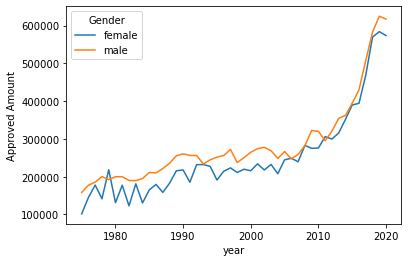

In [67]:
# Now lets plot
sns.lineplot(data = grouped_gender, x='year', y='Approved Amount', hue='Gender')

#### Objective 2: how much time from becoming an exployee to applying for a grant

In [68]:
# First, we summarize by researcher id to find the earliest date
first_empl = merged_empl.groupby('Person ID SNSF').date.min().reset_index()
first_appl = merged_appl.groupby('Person ID SNSF').date.min().reset_index()

In [69]:
# lets chedck
first_empl

,Person ID SNSF,date
0,1611,1990-01-10
1,1659,1988-01-11
2,1661,1978-01-07
3,1694,1978-01-06
4,1712,1982-01-04
...,...,...
80830,768766,2018-01-09
80831,768791,2020-01-03
80832,768792,2019-01-12
80833,768793,2019-01-10


In [70]:
# And this one...
first_appl

,Person ID SNSF,date
0,271,1989-09-20
1,367,1978-01-06
2,1236,1983-01-04
3,1275,1984-01-04
4,1296,1977-01-10
...,...,...
28171,757915,2020-01-11
28172,757920,2020-01-04
28173,758727,2020-01-05
28174,760184,2020-01-06


In [ ]:
# Both look good

In [72]:
# So now we merge both and rename as appropriate
merge_first = pd.merge(first_appl, first_empl, on = 'Person ID SNSF', suffixes=('_appl', '_empl'))
merge_first

,Person ID SNSF,date_appl,date_empl
0,1659,1975-01-10,1988-01-11
1,1661,1978-01-07,1978-01-07
2,1694,1985-01-01,1978-01-06
3,1712,1982-01-04,1982-01-04
4,1726,1985-01-03,1985-01-03
...,...,...,...
10336,748652,2019-01-12,2019-01-12
10337,748760,2020-01-03,2020-01-03
10338,749430,2020-01-04,2020-01-04
10339,749991,2020-01-03,2020-01-03


In [73]:
# Then we merge back into the main table
full_table = pd.merge(merge_first, merged_appl,on = 'Person ID SNSF')


In [74]:
# Finally, we can add a difference of dates column
full_table['time_diff'] = full_table.date_appl-full_table.date_empl
# Then we convert to years...
full_table.time_diff = full_table.time_diff.apply(lambda x: x.days/365)
# And check....
full_table


,Person ID SNSF,date_appl,date_empl,Last Name,First Name,Gender,Institute Name,Institute Place,OCRID,Projects as responsible Applicant,...,Discipline Name,Discipline Name Hierarchy,All disciplines,Start Date,End Date,Approved Amount,Keywords,date,year,time_diff
0,1659,1975-01-10,1988-01-11,Borner,Silvio,male,Institut für Volkswirtschaft WWZ / FGS Univers...,Basel,NaN,19;432;1767;9334;10363;10686;25341;30983;35421...,...,Economics,"Humanities and Social Sciences;Economics, law",10203,01.10.1975,31.12.1978,112664.0,NaN,1975-01-10,1975.0,-13.010959
1,1659,1975-01-10,1988-01-11,Borner,Silvio,male,Institut für Volkswirtschaft WWZ / FGS Univers...,Basel,NaN,19;432;1767;9334;10363;10686;25341;30983;35421...,...,Economics,"Humanities and Social Sciences;Economics, law",10203,01.04.1978,30.11.1980,228536.0,NaN,1978-01-04,1978.0,-13.010959
2,1659,1975-01-10,1988-01-11,Borner,Silvio,male,Institut für Volkswirtschaft WWZ / FGS Univers...,Basel,NaN,19;432;1767;9334;10363;10686;25341;30983;35421...,...,Economics,"Humanities and Social Sciences;Economics, law",10203,01.10.1985,31.03.1987,24204.0,NaN,1985-01-10,1985.0,-13.010959
3,1659,1975-01-10,1988-01-11,Borner,Silvio,male,Institut für Volkswirtschaft WWZ / FGS Univers...,Basel,NaN,19;432;1767;9334;10363;10686;25341;30983;35421...,...,Public Health and Health Services,Biology and Medicine;Social Medicine,30911,01.10.1987,30.09.1988,70093.0,NaN,1987-01-10,1987.0,-13.010959
4,1659,1975-01-10,1988-01-11,Borner,Silvio,male,Institut für Volkswirtschaft WWZ / FGS Univers...,Basel,NaN,19;432;1767;9334;10363;10686;25341;30983;35421...,...,Economics,"Humanities and Social Sciences;Economics, law",10203,01.06.1980,31.03.1984,340672.0,NaN,1980-01-06,1980.0,-13.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24092,748652,2019-01-12,2019-01-12,Le Bouc,Raphaël,male,Department of Economics Universität Zürich,Zürich,NaN,190501,...,Neurophysiology and Brain Research,Biology and Medicine;Basic Medical Sciences,30302,01.12.2019,31.10.2020,100000.0,orbitofrontal cortex; Motivation; Perception; ...,2019-01-12,2019.0,0.000000
24093,748760,2020-01-03,2020-01-03,Wartmann,Julia Elisabeth,female,Graduate School of Social Sciences (G3S) Depar...,Basel,NaN,191726,...,Political science,"Humanities and Social Sciences;Sociology, soci...",10202,01.03.2020,30.09.2023,246167.0,gender equality; institutional change; gender ...,2020-01-03,2020.0,0.000000
24094,749430,2020-01-04,2020-01-04,Valle,Giacomo,male,Scuola Superiore Sant'Anna The Biorobotics Ins...,Pisa,0000-0002-2637-8007,193724,...,Biomedical Engineering,Biology and Medicine;Clinical Medicine,30714/30708,01.04.2020,31.03.2021,129982.0,prosthesis; electrical stimulation; sensory fe...,2020-01-04,2020.0,0.000000
24095,749991,2020-01-03,2020-01-03,Bittel,Sarah,female,Department of Anthropology and Sociology The ...,Genève 1,NaN,191592,...,Ethnology,"Humanities and Social Sciences;Ethnology, soci...",10403,01.03.2020,30.09.2022,176024.0,Agency; Subjectivities; Politics; Asylum-Polic...,2020-01-03,2020.0,0.000000


array([[<AxesSubplot:title={'center':'time_diff'}>]], dtype=object)

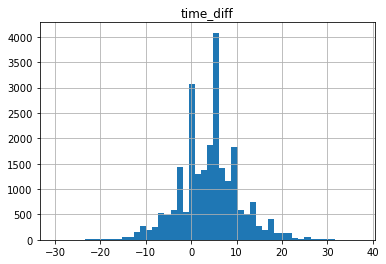

In [75]:
#Now, lets run a histogram
full_table.hist(column='time_diff',bins = 50)

#### Conclusions
Objective 1: Males typically earned more then females up until the 2010s. This may have reversed during Corona.
Objective 2: Median time delta is five years, with a second peak at year zero. Given that Ph.D. students are employees in Europe, the former possibly corresponds to them wrapping up post doc applications. As for the latter, this is most probably new faculty arriving with a grant having been already rewarded commensurate with employment. 